Task 1 Problem 1:
Aesthetics: X = Income, Y = Life expectancy, Size = Population, Color = World Regions, Background = Year

In [1]:
pip install pandas

Task 1 Problem 2:

In [69]:
import pandas as pd
import numpy as np
from plotnine import *


df1 = pd.read_csv('q1data.csv')
print(df1.head())

    income  life_exp  population  year  ... four_regions               six_regions       eight_regions           world_bank_region
0   1910.0      61.0  29200000.0  2010  ...         asia                south_asia           asia_west                  South Asia
1  11100.0      78.1   2950000.0  2010  ...       europe       europe_central_asia         europe_east       Europe & Central Asia
2  11100.0      74.7  36000000.0  2010  ...       africa  middle_east_north_africa        africa_north  Middle East & North Africa
3  46900.0      81.9     84500.0  2010  ...       europe       europe_central_asia         europe_west       Europe & Central Asia
4   7680.0      60.8  23400000.0  2010  ...       africa        sub_saharan_africa  africa_sub_saharan          Sub-Saharan Africa

[5 rows x 9 columns]
    income  life_exp  population  year  ... four_regions               six_regions       eight_regions           world_bank_region
0   1910.0      61.0  29200000.0  2010  ...         asia     

In [183]:
cleandf1 = df1.dropna()

In [109]:
custom_colors = {"africa" :  "#0beeea",  "americas" : "#4bfe0b", "europe" : "#ffff00", "asia" : "#ed1b84", "nan" : "#111111"}

Task 1 Problem 3:

C:\Users\sjacob17\AppData\Local\anaconda3\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 7 rows containing missing values.


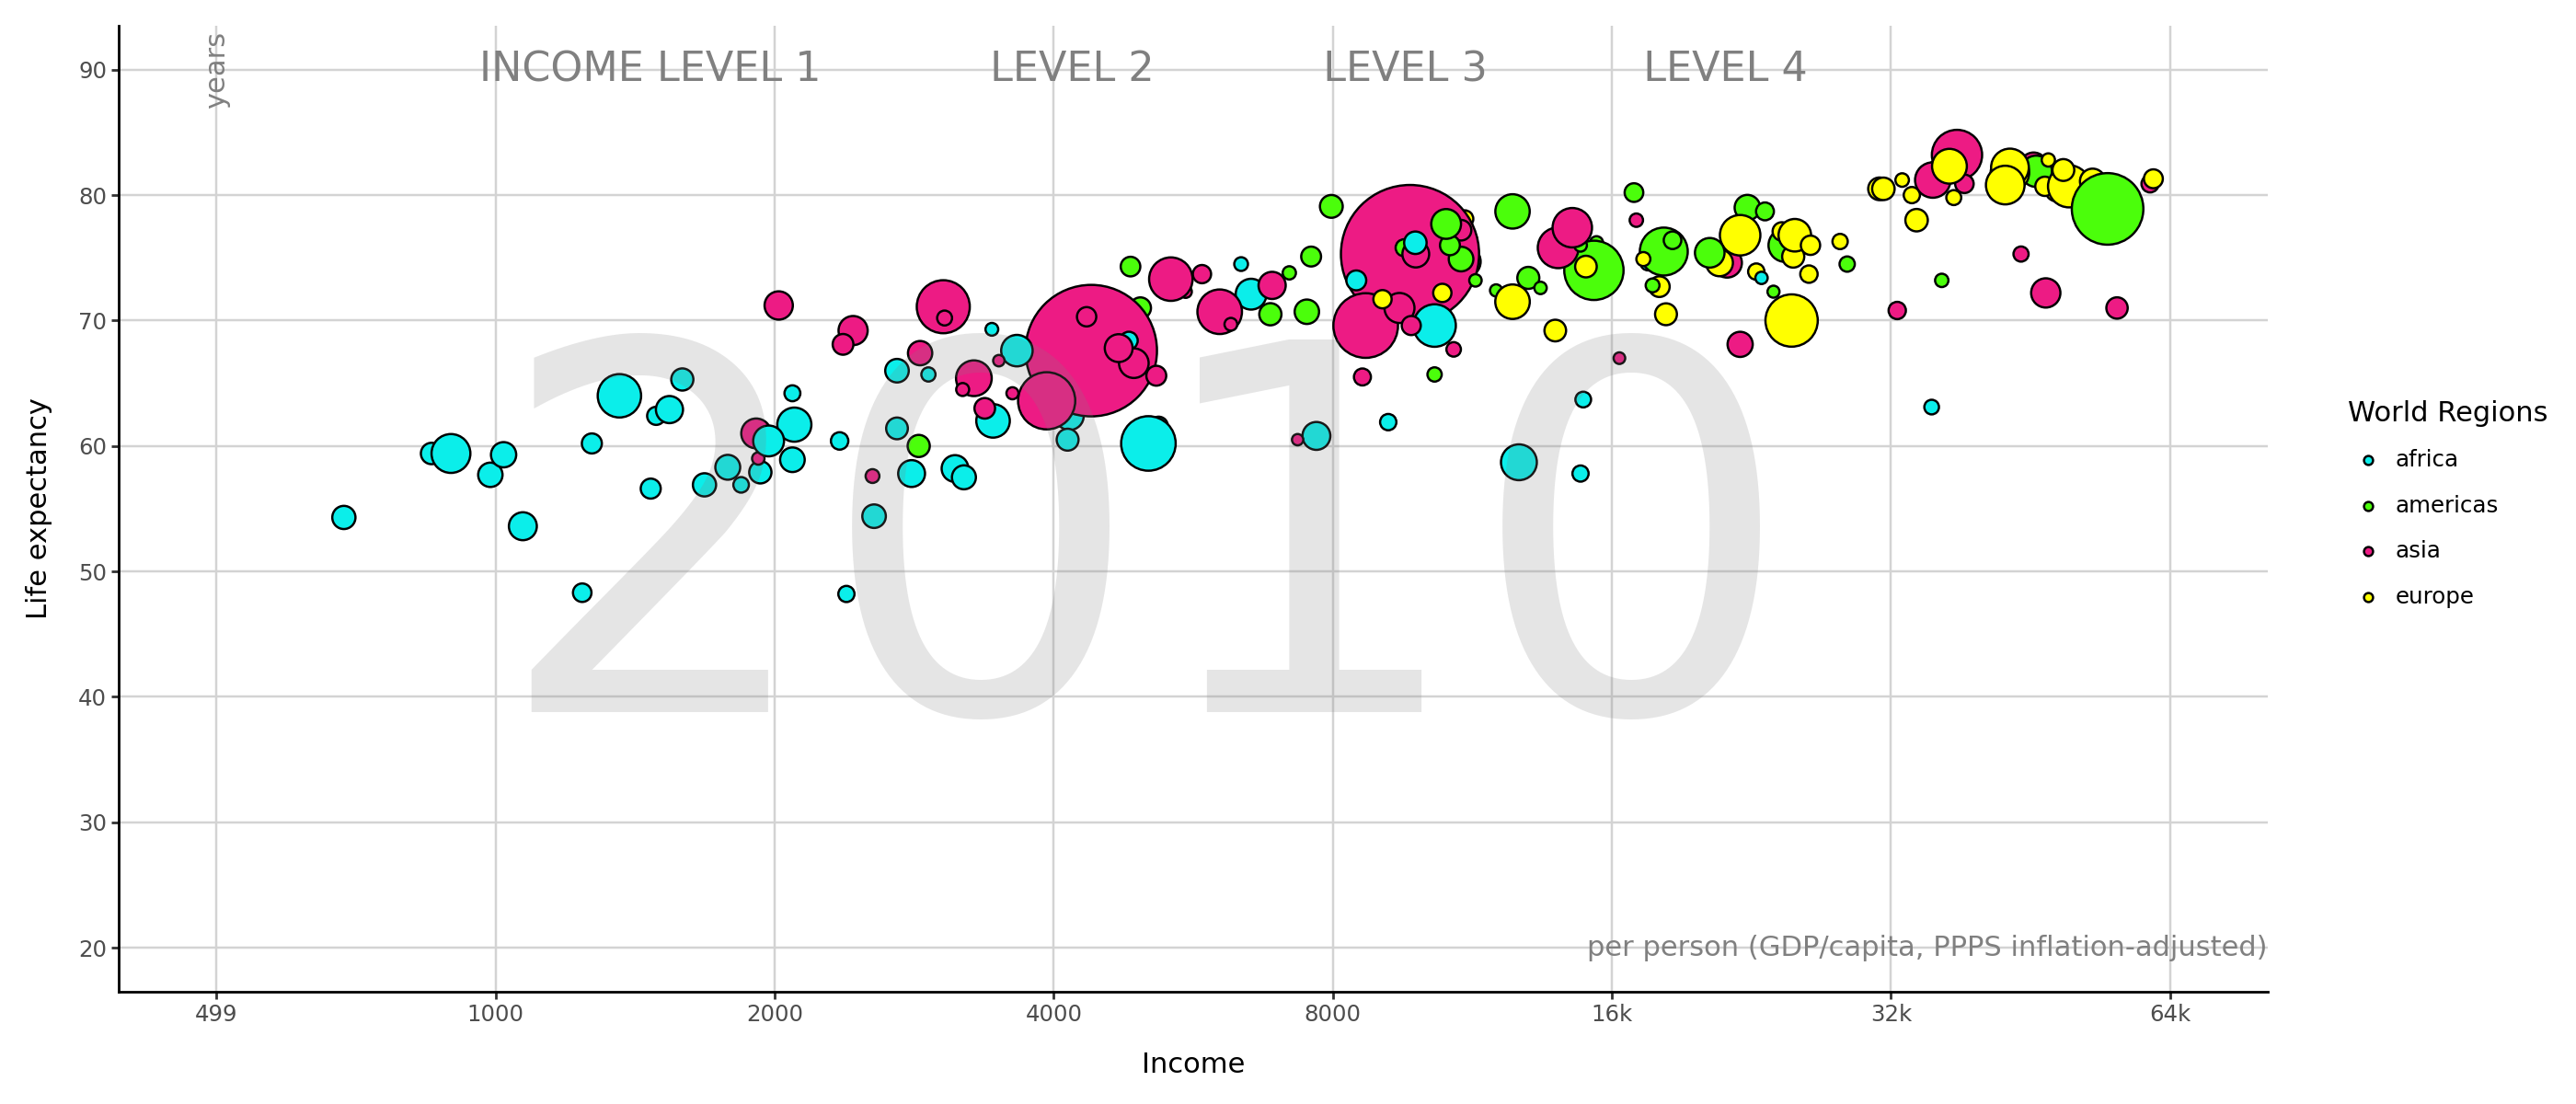

In [184]:
#I think I need to make country a numerical variable
#Size and X axisis going to be GDP per capita
#How do I get GDP Per capita

#Used ChatGPT to format the x axis
#Used ChatGPT to find the following functions used below...

def custom_log_labels(x):
    return [f'{int(i / 1000)}k' if i >= 16000 else str(int(i)) for i in x]

(ggplot(cleandf1, aes(x = "income", y = "life_exp", size = "population", fill = "four_regions"))
+ geom_hline(yintercept=[20, 30, 40, 50, 60, 70, 80, 90], color='lightgray', size=0.5) 
+ geom_vline(xintercept=[500, 1000, 2000, 4000, 8000, 16000, 32000, 64000], color='lightgray', size=0.5) 
+ geom_point(alpha = 1)
+ scale_x_log10(breaks = (500, 1000, 2000, 4000, 8000, 16000, 32000, 64000), limits=(500,64000), labels=custom_log_labels)
+ scale_y_continuous(limits=(20,90), breaks = np.arange(20,91,10))
+ scale_size(range=(2,30))
+ guides(size=False)
+ theme_classic()  # Removes the gray background
+ annotate('text', x=5000, y=50, label='2010', size=200, color='gray', alpha=0.2)
+ labs(x='Income', y='Life expectancy', fill = "World Regions")
+ annotate('text', x=5000, y=90, label='INCOME LEVEL 1             LEVEL 2             LEVEL 3            LEVEL 4', size=16, color='gray', ha='center')
+ theme(figure_size= (14,6))
+ scale_fill_manual(values = custom_colors)
+ annotate("text", x=500, y=90, label='years', angle=90, color="gray")
+ annotate("text", x=35000, y=20, label='per person (GDP/capita, PPPS inflation-adjusted)', color="gray")
)




Task 1 Problem 4:

C:\Users\sjacob17\AppData\Local\anaconda3\Lib\site-packages\plotnine\stats\stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 15'. Pick better value with 'binwidth'.


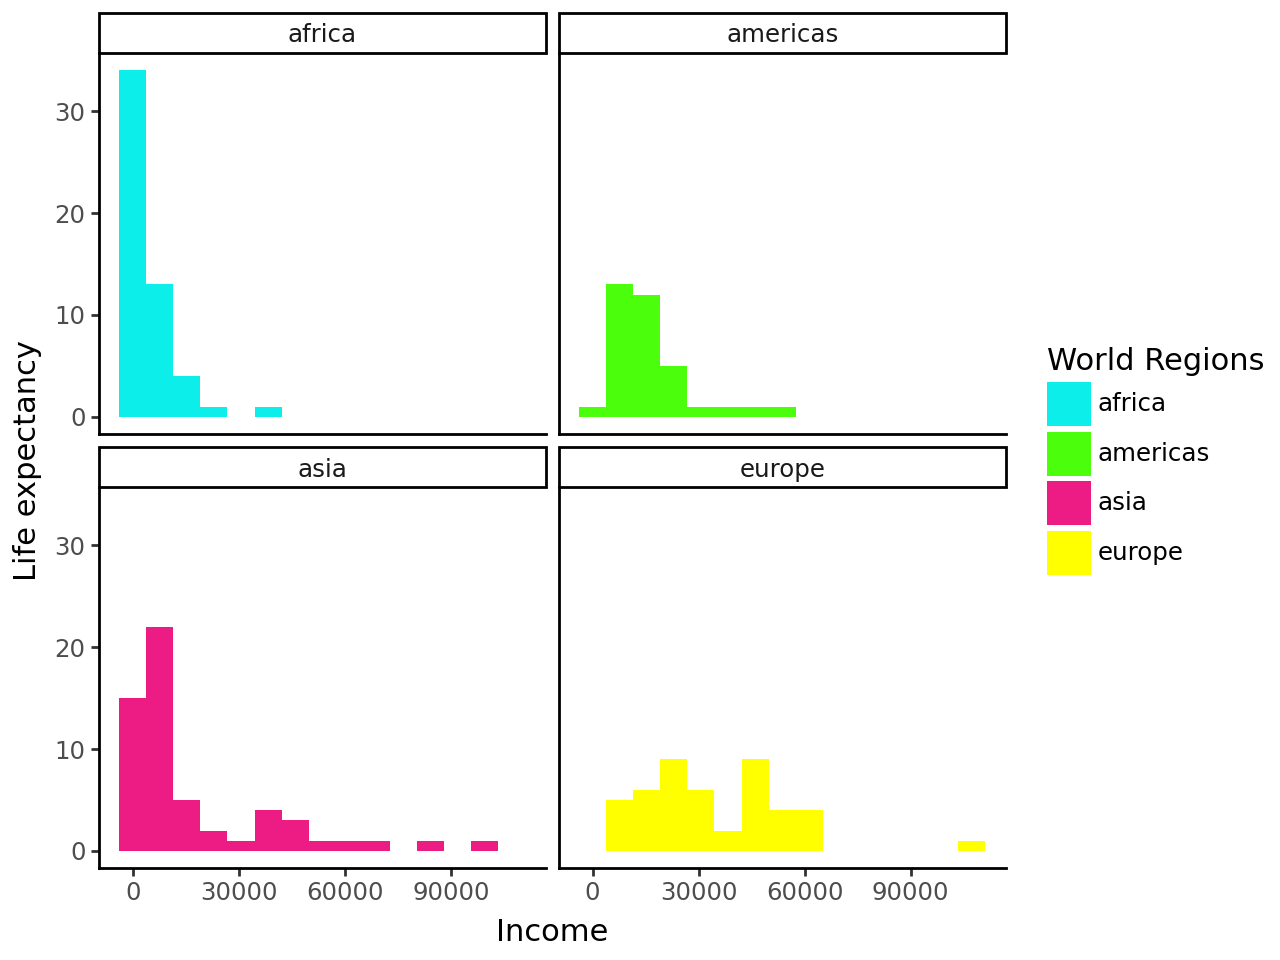

In [189]:
#Task 1 New Geometry
(ggplot(cleandf1,
aes(
  x = "income",
  fill = "four_regions"
))
+ geom_histogram()
+ facet_wrap("four_regions")
+theme_classic()
+ scale_fill_manual(values = custom_colors)
+ labs(x='Income', y='Life expectancy', fill = "World Regions")
)

Task 2 Problem 1: 
Aesthetics: X = Exports (\% of GDP), Y = Imports (\% of GDP), Size = Energy Use, Color = World Regions, Background = Year

Task 2 Problem 2: 

In [37]:
import pandas as pd

df2 = pd.read_csv('q2data.csv')

print(df2.head())

   imports  exports energy  year  ... four_regions               six_regions       eight_regions           world_bank_region
0      NaN      NaN    NaN  1997  ...         asia                south_asia           asia_west                  South Asia
1     36.7     11.5    427  1997  ...       europe       europe_central_asia         europe_east       Europe & Central Asia
2     22.5     22.6    825  1997  ...       africa  middle_east_north_africa        africa_north  Middle East & North Africa
3      NaN      NaN    NaN  1997  ...          NaN                       NaN                 NaN                         NaN
4      NaN      NaN    434  1997  ...       africa        sub_saharan_africa  africa_sub_saharan          Sub-Saharan Africa

[5 rows x 9 columns]
   imports  exports energy  year  ... four_regions               six_regions       eight_regions           world_bank_region
0      NaN      NaN    NaN  1997  ...         asia                south_asia           asia_west       

Task 2 Problem 3: 

<positron-console-cell-135>:15: SyntaxWarning: invalid escape sequence '\%'
<positron-console-cell-135>:15: SyntaxWarning: invalid escape sequence '\%'
<positron-console-cell-135>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<positron-console-cell-135>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


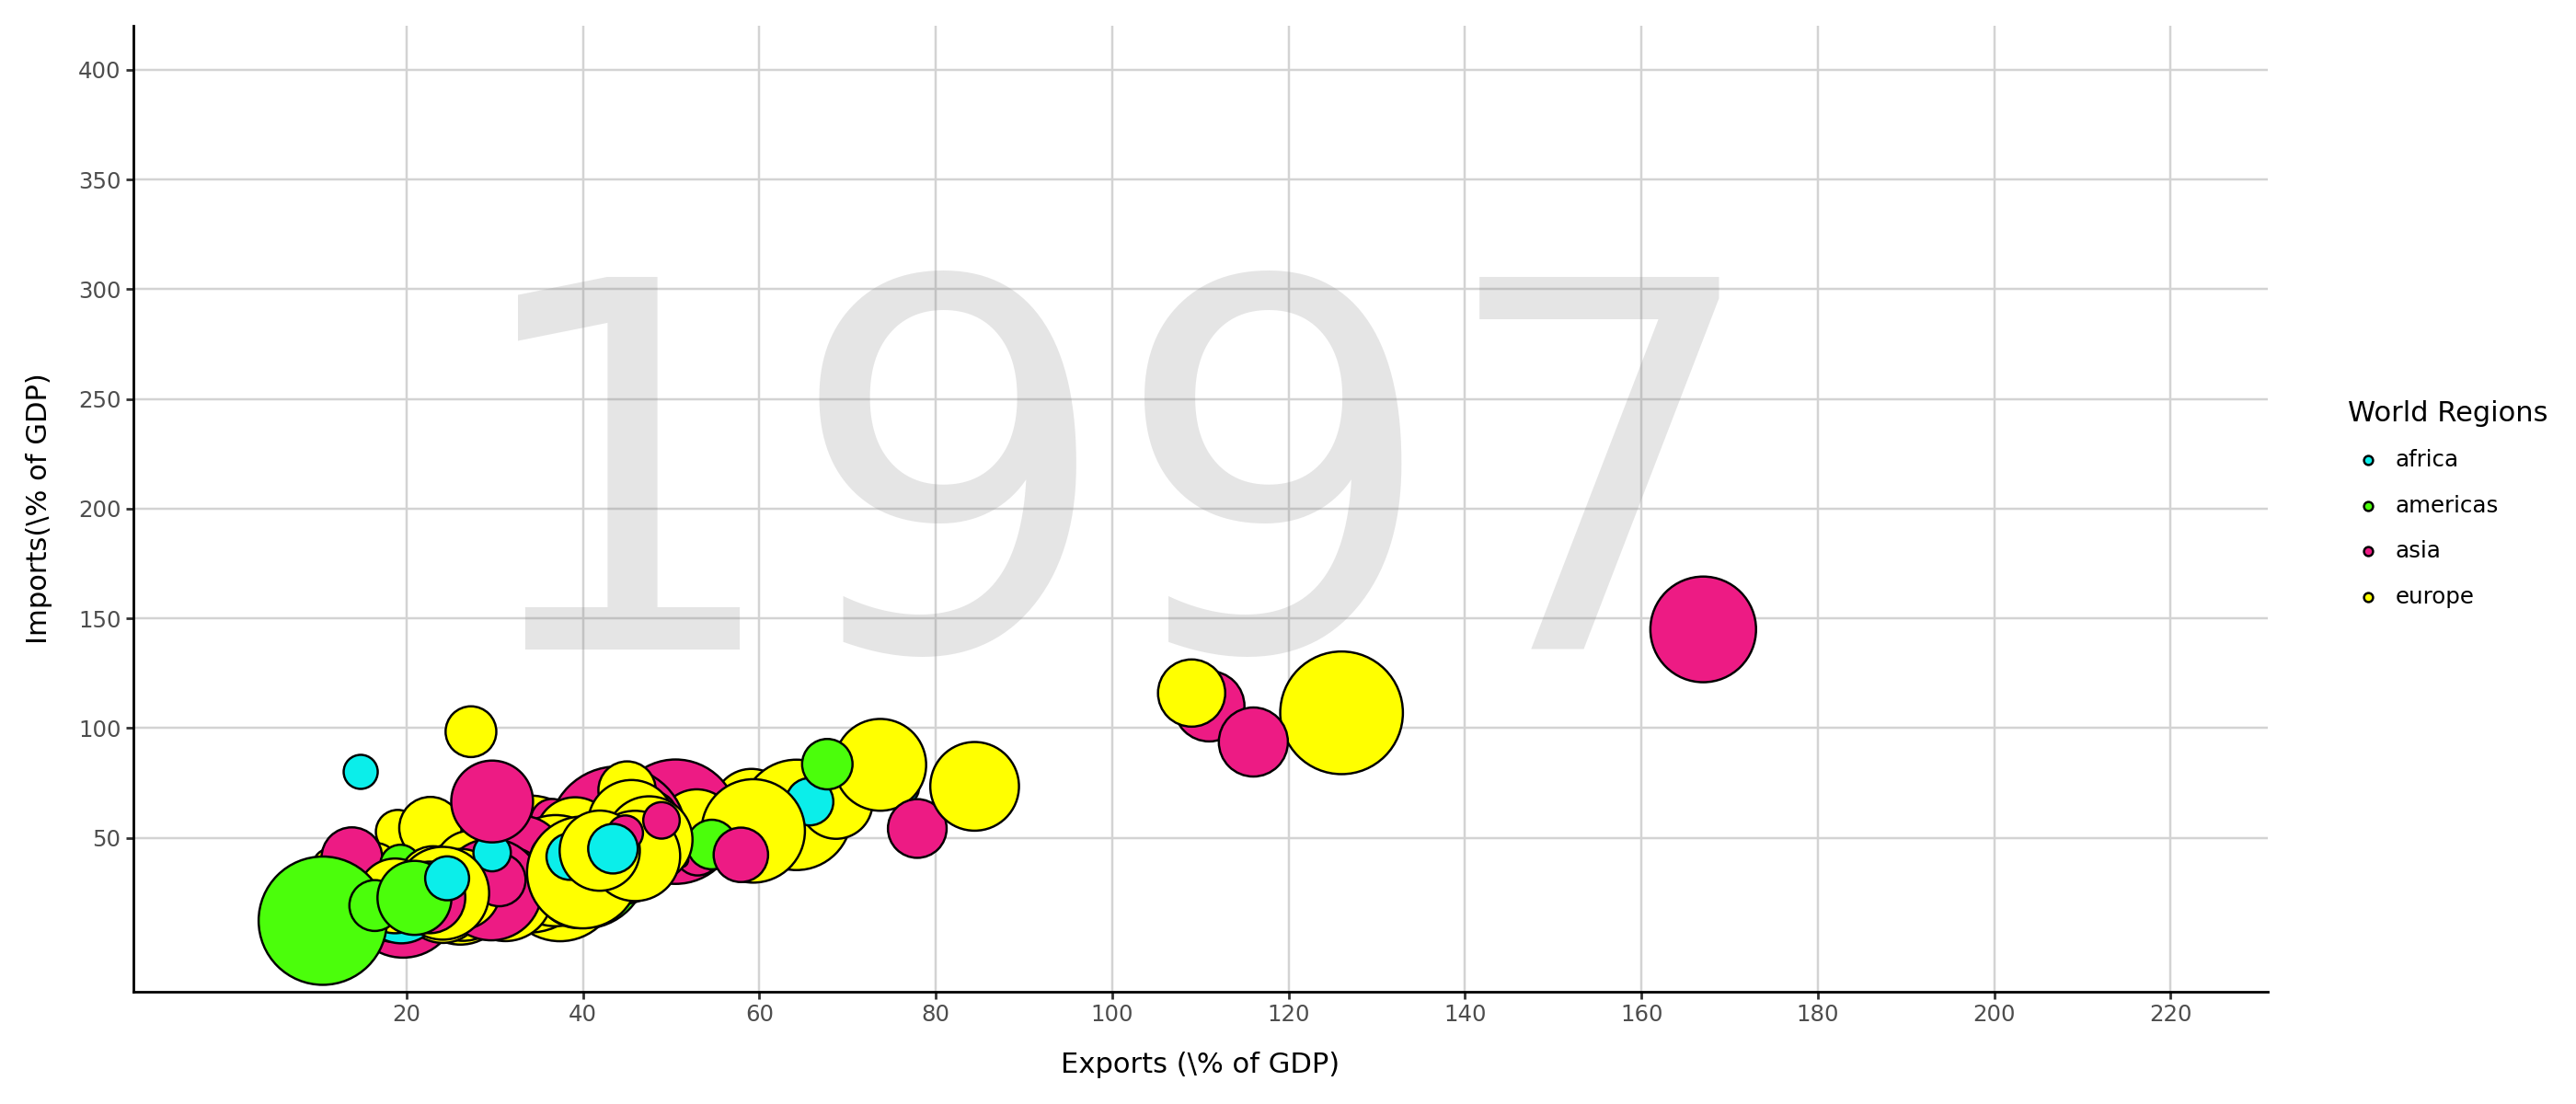

In [135]:
cleandf2 = df2.dropna()
cleandf2['energy'] = cleandf2['energy'].str.replace('k', '000')
cleandf2['energy'] = cleandf2['energy'].astype(float)

(ggplot(cleandf2, aes(x = "exports", y = "imports", size = "energy", fill = "four_regions"))
+ geom_vline(xintercept=[20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220], color='lightgray', size=0.5) 
+ geom_hline(yintercept=[50, 100, 150, 200, 250, 300, 350, 400], color='lightgray', size=0.5) 
+ geom_point(alpha = 1)
+ scale_x_continuous(breaks = (20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220), limits=(0,220))
+ scale_y_continuous(breaks =(50, 100, 150, 200, 250, 300, 350, 400), limits = (0,400))
+ scale_size(range=(2,30))
+ guides(size=False)
+ theme_classic() 
+ annotate('text', x=100, y=200, label='1997', size=200, color='gray', alpha=0.2)
+ labs(x='Exports (\% of GDP)', y='Imports(\% of GDP)', fill = "World Regions")
+ theme(figure_size= (14,6))
+ scale_fill_manual(values = custom_colors))

Task 2 Problem 4: 

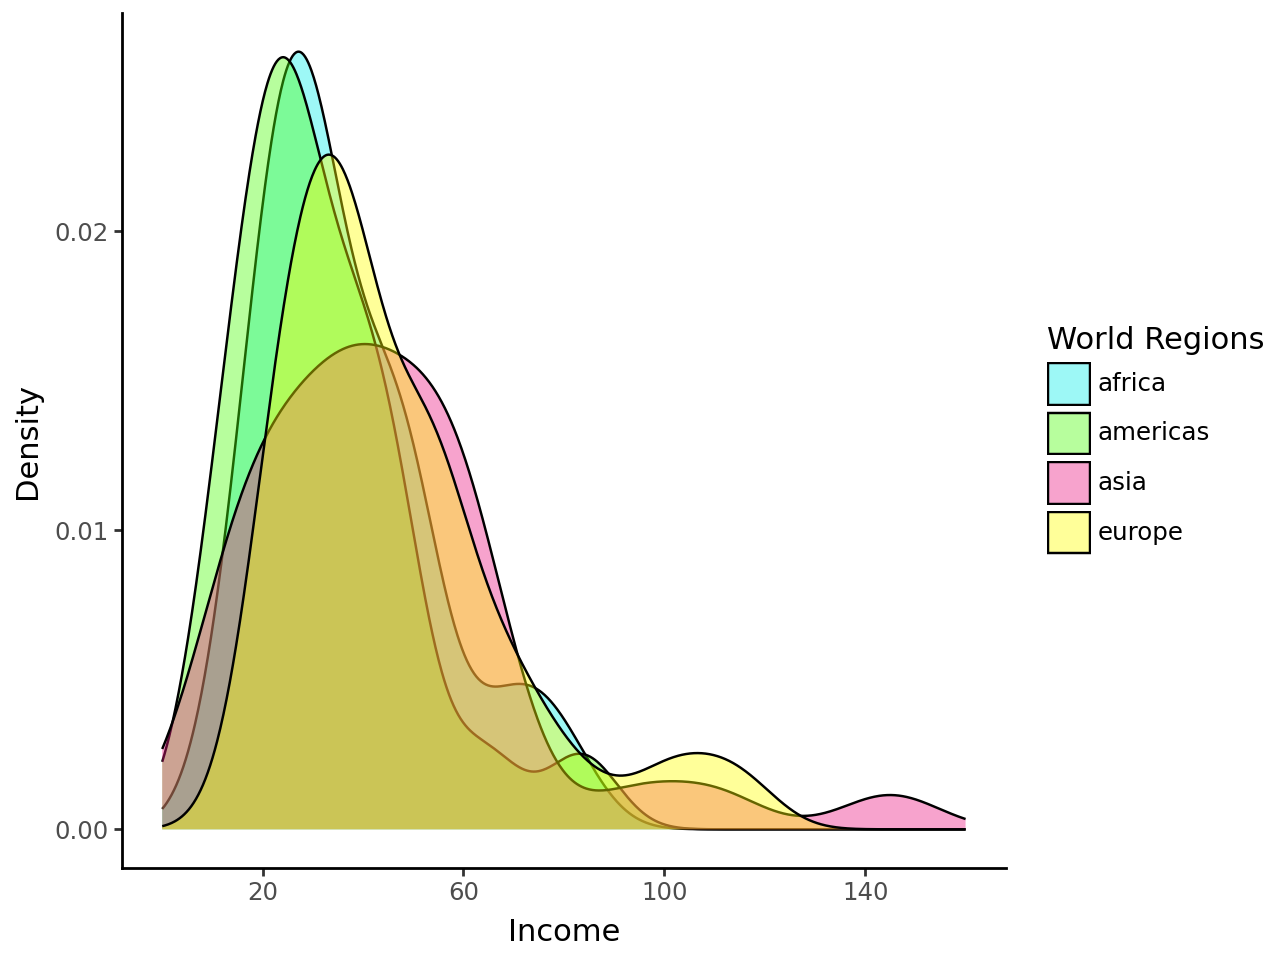

In [199]:
#Task 2 New Geometry
(ggplot(cleandf2,
aes(
  x = "imports",
  fill = "four_regions"
))
+ geom_density(alpha=0.4)
+theme_classic()
+ scale_fill_manual(values = custom_colors)
+ labs(x='Income', y='Density', fill = "World Regions")
+ scale_x_continuous(breaks = (20, 60, 100, 140, 180, 220), limits=(0,160))
)

Task 3 Problem 1:
Aesthetics: X = Individuals using the Internet, Y = GDP/capita, Size =  Income, Color = World Regions, Background = Year

Task 3 Problem 2:

In [38]:
import pandas as pd

df3 = pd.read_csv('q3data.csv')

print(df3.head())

   internet_users      gdp   income  year  ... four_regions               six_regions eight_regions           world_bank_region
0         0.00456    330.0   1190.0  2001  ...         asia                south_asia     asia_west                  South Asia
1         0.39000   2570.0   6780.0  2001  ...       europe       europe_central_asia   europe_east       Europe & Central Asia
2         1.59000   3770.0   9230.0  2001  ...       africa  middle_east_north_africa  africa_north  Middle East & North Africa
3             NaN  10500.0      NaN  2001  ...          NaN                       NaN           NaN                         NaN
4        11.30000  42600.0  35600.0  2001  ...       europe       europe_central_asia   europe_west       Europe & Central Asia

[5 rows x 9 columns]
   internet_users      gdp   income  year  ... four_regions               six_regions eight_regions           world_bank_region
0         0.00456    330.0   1190.0  2001  ...         asia                south_a

Task 3 Problem 3:

<positron-console-cell-202>:21: SyntaxWarning: invalid escape sequence '\%'
C:\Users\sjacob17\AppData\Local\anaconda3\Lib\site-packages\plotnine\scales\scale_continuous.py:221: RuntimeWarning: divide by zero encountered in log2


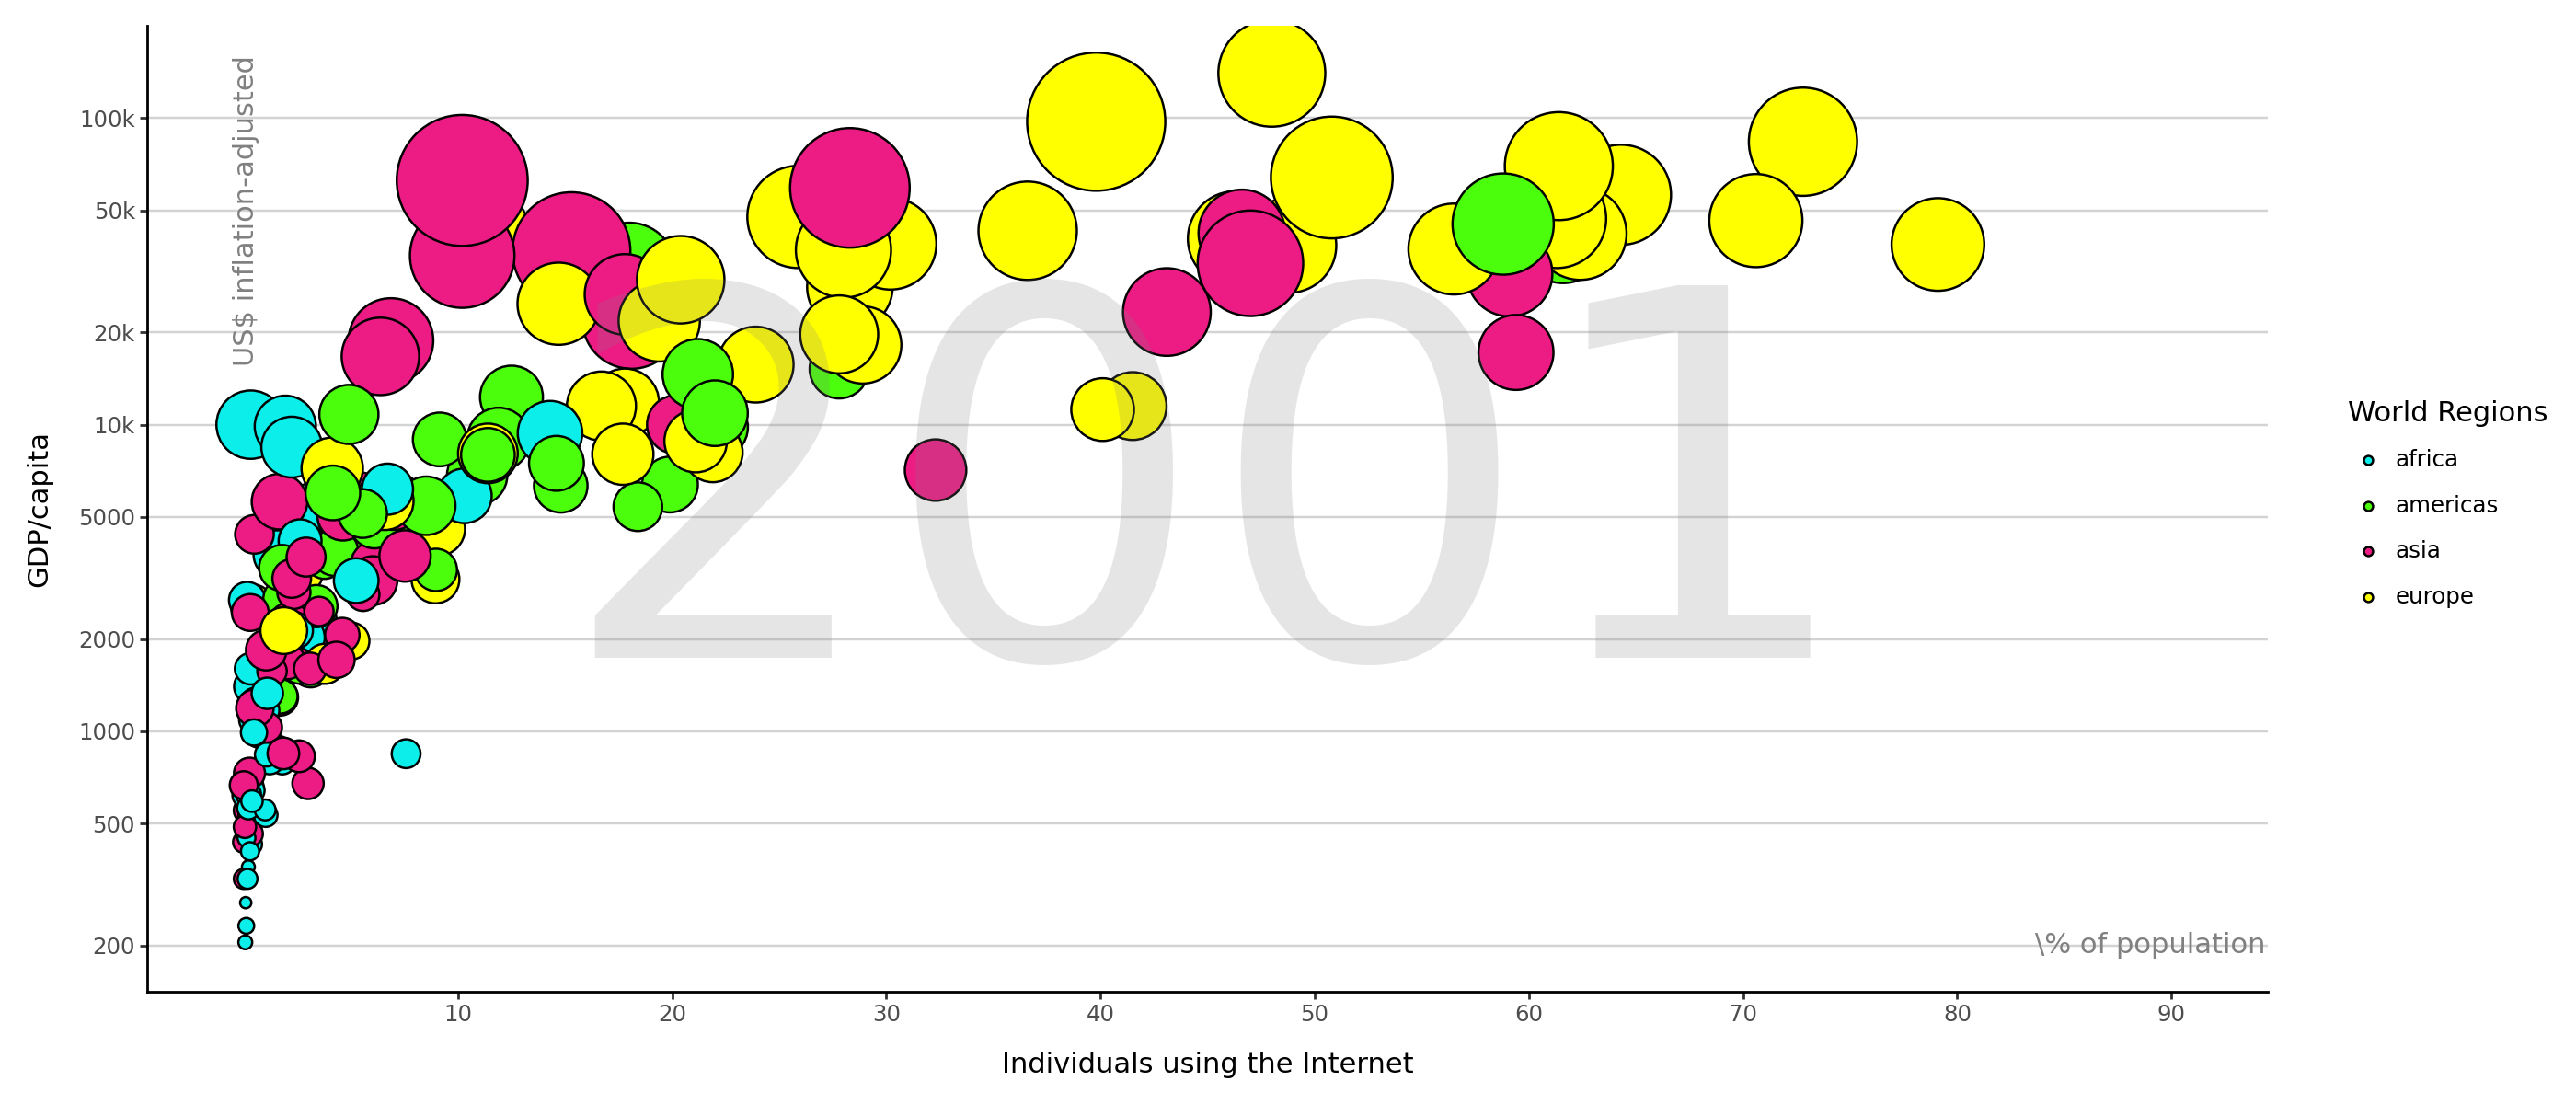

In [202]:
cleandf3 = df3.dropna()


(ggplot(cleandf3, aes(x = "internet_users", y = "gdp", size = "income", fill = "four_regions"))
+ geom_vline(xintercept=[10, 20, 30, 40, 50, 60, 70, 80, 90], color='lightgray', size=0.5) 
+ geom_hline(yintercept=[200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000], color='lightgray', size=0.5) 
+ geom_point(alpha = 1)
+ scale_x_continuous(breaks = (10, 20, 30, 40, 50, 60, 70, 80, 90), limits=(0,90))
+ scale_y_continuous(trans = 'log2', 
    breaks =(200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000), 
    limits = (0,200000), 
    labels=(200, 500, 1000, 2000, 5000, '10k', '20k', '50k', '100k'))
+ scale_size(range=(2,30))
+ guides(size=False)
+ theme_classic() 
+ annotate('text', x=45, y=5000, label='2001', size=200, color='gray', alpha=0.2)
+ labs(x='Individuals using the Internet', y='GDP/capita', fill = "World Regions")
+ theme(figure_size= (14,6))
+ scale_fill_manual(values = custom_colors)
+ annotate("text", x=.1, y=50000, label='US$ inflation-adjusted', angle=90, color="gray")
+ annotate("text", x=89, y=200, label='\% of population', color="gray")
)

Task 3 Problem 4:

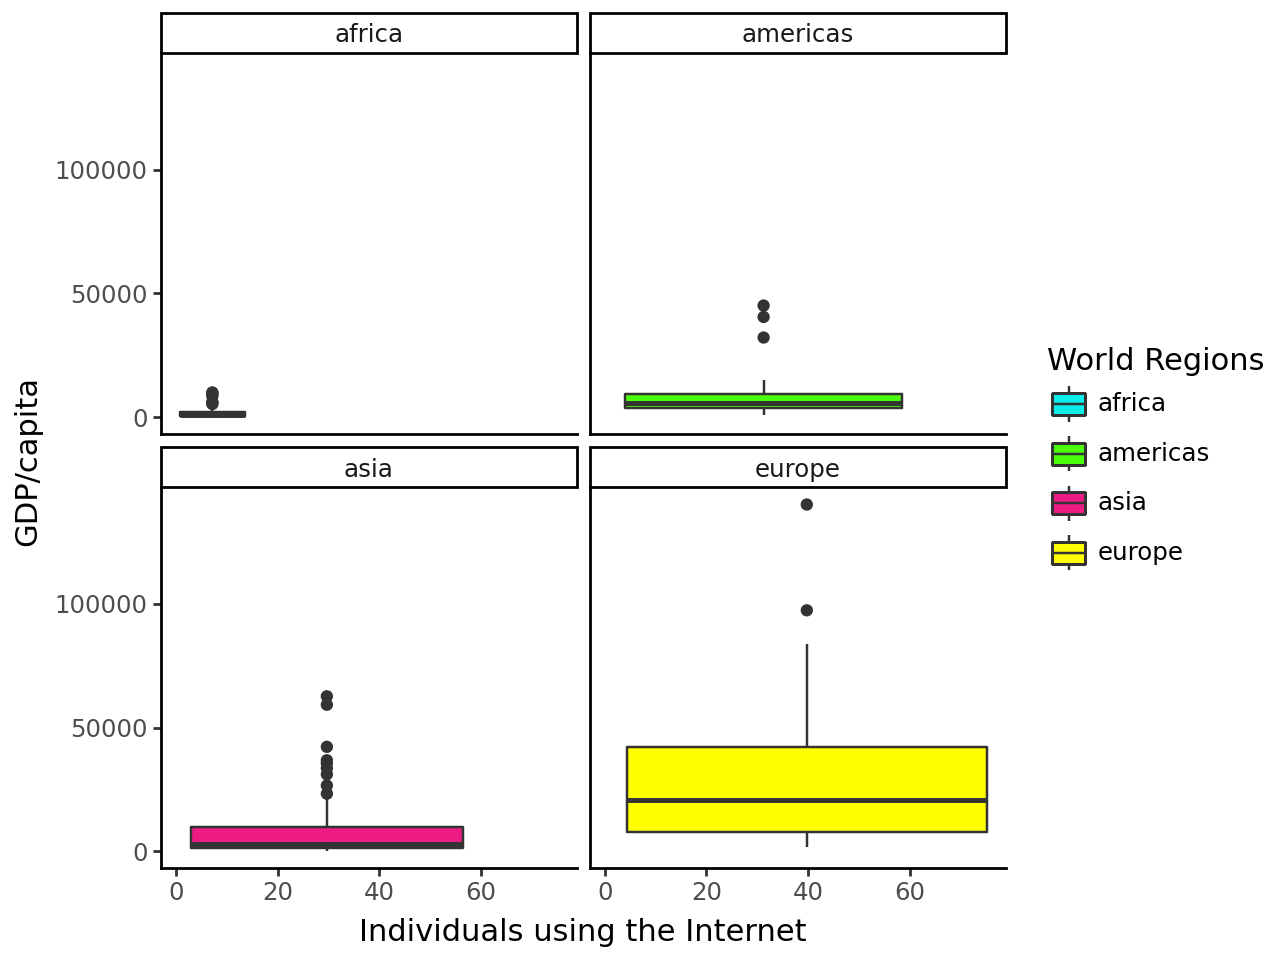

In [201]:
#Task 3 New Geometry
(ggplot(cleandf3,
aes(
  x = "internet_users",
  y = "gdp",
  fill = "four_regions"
))
+ geom_boxplot()
+ facet_wrap("four_regions")
+theme_classic()
+ scale_fill_manual(values = custom_colors)
+ labs(x='Individuals using the Internet', y='GDP/capita', fill = "World Regions")
)